<a href="https://colab.research.google.com/github/cesaralejon/M-tricas-de-clasificaci-n/blob/main/Metricas_clasificaci%C3%B3n_Cesar_Olmedo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seaborn
import numpy as np

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix

In [5]:
filename = ('/content/drive/MyDrive/Coding Dojo/Week 7/bank_modified.csv')
df = pd.read_csv(filename)
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [7]:
df.shape

(4521, 26)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

## Regresion Logistica

In [10]:
x = df.drop(columns = 'y_yes')
y= df['y_yes']


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 0, stratify= y)

In [14]:
scalar= StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [18]:
reg_log = LogisticRegression(solver='liblinear')
reg_log.fit(x_train, y_train)
print('Accuracy', reg_log.score(x_train, y_train))
print('Accuracy', reg_log.score(x_test, y_test))

Accuracy 0.8924225663716814
Accuracy 0.8850828729281768


In [23]:
from sklearn.model_selection import GridSearchCV

In [28]:
parametros = {'penalty': ['l1','l2'],
              'C': [0.001, .001, .01, .1, 1,10],
              'class_weight': [None, 'balanced']}

In [30]:
grid= GridSearchCV(reg_log, parametros, cv=4)
grid.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']})

In [31]:
grid.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}

##Precisión

In [32]:
print('Accuracy', grid.score(x_train, y_train))
print('Accuracy', grid.score(x_test, y_test))

Accuracy 0.8926991150442478
Accuracy 0.887292817679558


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


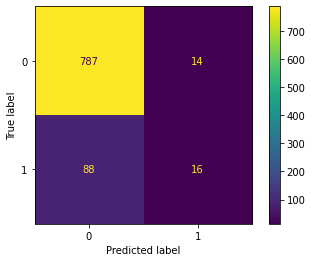

In [33]:
plot_confusion_matrix(grid,x_test, y_test)

## Sensibilidad

In [39]:
tn= 16
tp= 787
fp= 88
fn= 14

In [42]:
sensibilidad = tp / (tp + fn)
print(sensibilidad)

0.982521847690387


## Especificidad

In [44]:
especificidad = tn / (tn+ fp)
print(especificidad)

0.15384615384615385


## AUC ROC

In [58]:
print('Testing AUC',{roc_auc_score(y_test, grid.predict_proba(x_test)[:,1])})

TypeError: ignored